# Part 1: Load MNIST data set and format it

In [1]:
# Usaremos la base de datos MNIST
# Esta base de datos contiene imágenes binarias de dígitos escritos a mano.
# Usaremos las imágenes extendidas en forma de vector como datos 'x' y sus
# respectivas etiquetas (enteros) como valores de salida 'y'.

# El objetivo es diseñar redes neuronales que, con ayuda de regularizadores,
# sean capaces de obtener buen desempeño de clasificación multi-clase, tanto
# en los datos de entrenamiento como en los de validación y prueba.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import random

In [3]:
random.seed(9001)

In [4]:
# Load data set
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Using TensorFlow backend.


Shapes
x_train: (60000, 28, 28)
x_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


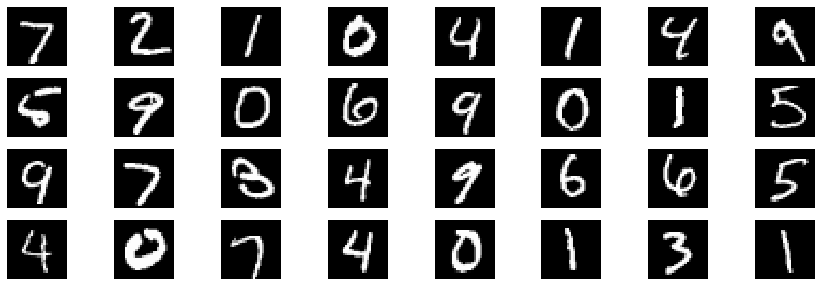

In [5]:
# Visualize a few examples
plt.figure(figsize=(15, 5))
for ind in range(32):
    plt.subplot(4, 8, ind+1)
    plt.imshow(x_test[ind], cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
# Put images into a vector format
x_train = np.reshape(x_train, (len(x_train), -1)).astype('float32') # tf requires float32 or float64
x_test  = np.reshape(x_test,  (len(x_test),  -1)).astype('float32')

print("X shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

X shapes
x_train: (60000, 784)
x_test: (10000, 784)


In [7]:
# Put categorical data into one-hot encoding format
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Y shapes")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Y shapes
y_train: (60000, 10)
y_test: (10000, 10)


# Part 2: Create DNN model and train it

In [8]:
# tensorflow imports
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout
from keras.regularizers import l1, l2

In [9]:
# == - ==
# La celda siguiente contiene dos modelos de redes neuronales. Comenta uno y usa otro.
# Evalua uno a la vez y reporta tus resultados.
#
# Nota que importamos layers tipo BatchNorm y Dropout, los cuales son usados en 
# distintas secciones del modelo.
# También importamos regularizadores l1 y l2, los cuales son usados como parametros
# de las capas.
#
# Nota también el uso del parametro "mertics" en la compilación del modelo.
# Este parámetro es sólo informativo, pero no se usa para optimizar el modelo.
# En el caso particular de este modelo, se indica la exactitud de la clasificación,
# sin embargo la minimización del error se hace con la función de pérdida "categorical_crossentropy"
# Puedes revisar más detalles en la documentación de Keras o tf.
#
# Q1: Según los resultados que hayas obtenido, ¿cuál de los dos modelos es preferible y por qué?
# Q2: ¿Por qué usamos softmax en la salida de la red?
# Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de "entrenamiento"
#     menor o igual a 0.08 y exactitud mayor o igual a 98%.
#     Reporta el número de capas y sus tamaños.
# Q4: Ahora usa esos mismos valores de hiperparámetros (número de capas y sus tamaños)
#     en el segundo modelo, y ajusta la taza de dropout, y las alfas en los regularizadores l1 y l2
#     para disminuir el error de generalización (validación).
#     Reporta el modelo regularizado que te haya dado mejores resultados.
# Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica
#     el número de sus capas y tamaños para disminuir aún más los errores, tanto
#     el de entrenamiento como el de validación.
#     Reporta tu mejor modelo.
# =======

## Q1 Try 01

In [10]:
# Create a Deep Network
DNN = Sequential()

# -- Try 01 --
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dense(4, activation='relu'))
DNN.add(Dense(2, activation='relu'))
DNN.add(Dense(1, activation='relu'))
# -- ------ --

# -- Try 02 --
#DNN.add(InputLayer(input_shape=x_train.shape[1:]))
#DNN.add(Dropout(rate=0.33))
#DNN.add(Dense(4))
#DNN.add(BatchNormalization())
#DNN.add(Activation('relu'))
#DNN.add(Dense(4, activation='relu', activity_regularizer=l1(l=3e-15)))
#DNN.add(Dense(4, activation='relu', activity_regularizer=l2(l=3e-15)))
# -- ------ --

DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
Total params: 3,173
Trainable params: 3,173
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más opciones.
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.6, decay=0.97, nesterov=True)
DNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

In [12]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 1s 15us/step - loss: 2.3170 - accuracy: 0.1132 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 2/50
54000/54000 [==============================] - 1s 12us/step - loss: 2.3025 - accuracy: 0.1132 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 3/50
54000/54000 [==============================] - 1s 13us/step - loss: 2.3025 - accuracy: 0.1132 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 4/50
54000/54000 [==============================] - 1s 12us/step - loss: 2.3025 - accuracy: 0.1132 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 5/50
54000/54000 [==============================] - 1s 12us/step - loss: 2.3025 - accuracy: 0.1132 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 6/50
54000/54000 [==============================] - 1s 12us/step - loss: 2.3025 - accuracy: 0.1132 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 7/50
54000/54000 [==============================] - 1s 12us/ste

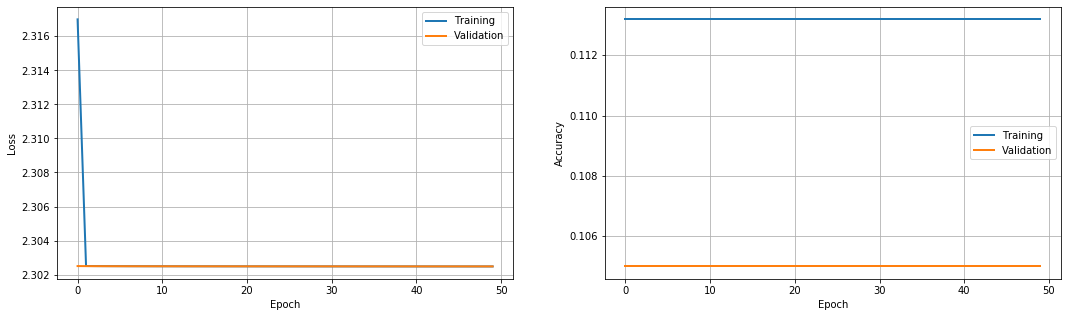

In [13]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [14]:
# Compute test loss and min training loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)
print("Training_loss:", DNN.history.history['loss'][-1])

Test loss: 2.302463066864014
Test acc: 0.11349999904632568
Training_loss: 2.3024807889020003


In [15]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [16]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

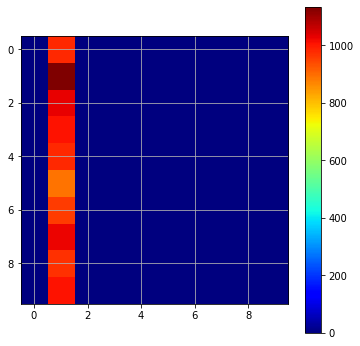

In [17]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

## Q1 - Try 02

In [18]:
# Create a Deep Network
DNN = Sequential()

# -- Try 01 --
#DNN.add(InputLayer(input_shape=x_train.shape[1:]))
#DNN.add(Dense(4, activation='relu'))
#DNN.add(Dense(2, activation='relu'))
#DNN.add(Dense(1, activation='relu'))
# -- ------ --

# -- Try 02 --
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dropout(rate=0.33))
DNN.add(Dense(4))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))
DNN.add(Dense(4, activation='relu', activity_regularizer=l1(l=3e-15)))
DNN.add(Dense(4, activation='relu', activity_regularizer=l2(l=3e-15)))
# -- ------ --

DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 3140      
_________________________________________________________________
batch_normalization_1 (Batch (None, 4)                 16        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [19]:
# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más opciones.
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.6, decay=0.97, nesterov=True)
DNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

In [20]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 1s 24us/step - loss: 2.3387 - accuracy: 0.1155 - val_loss: 2.2702 - val_accuracy: 0.1342
Epoch 2/50
54000/54000 [==============================] - 1s 20us/step - loss: 2.3231 - accuracy: 0.1184 - val_loss: 2.2631 - val_accuracy: 0.1368
Epoch 3/50
54000/54000 [==============================] - 1s 20us/step - loss: 2.3180 - accuracy: 0.1192 - val_loss: 2.2592 - val_accuracy: 0.1367
Epoch 4/50
54000/54000 [==============================] - 1s 20us/step - loss: 2.3147 - accuracy: 0.1203 - val_loss: 2.2570 - val_accuracy: 0.1362
Epoch 5/50
54000/54000 [==============================] - 1s 20us/step - loss: 2.3123 - accuracy: 0.1210 - val_loss: 2.2545 - val_accuracy: 0.1378
Epoch 6/50
54000/54000 [==============================] - 1s 20us/step - loss: 2.3103 - accuracy: 0.1212 - val_loss: 2.2533 - val_accuracy: 0.1382
Epoch 7/50
54000/54000 [==============================] - 1s 20us/ste

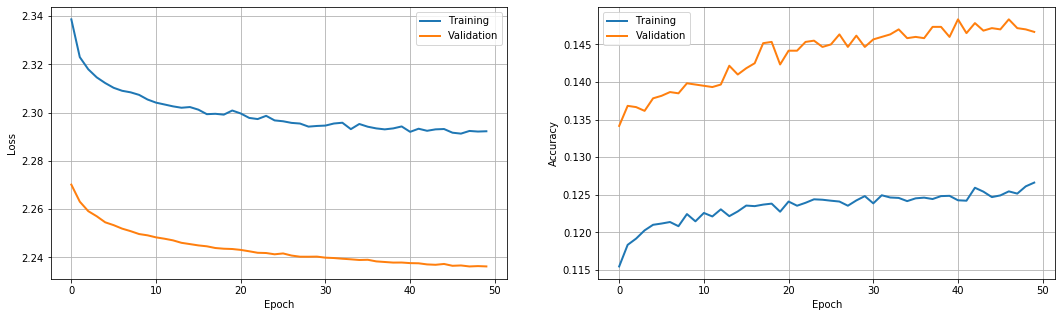

In [21]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [22]:
# Compute test loss and min training loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)
print("Training_loss:", DNN.history.history['loss'][-1])

Test loss: 2.2539599685668947
Test acc: 0.14270000159740448
Training_loss: 2.292300039715237


In [23]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [24]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

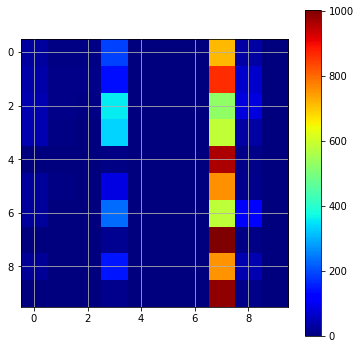

In [25]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

## Q1: Según los resultados que hayas obtenido, ¿cuál de los dos modelos es preferible y por qué?

El segundo modelo es preferible por que podemos observar como conforme aumentan las epocas, nuestro modelo alcanza un mejor desempeño tanto en el training loss como en el validation loss. Por el otro lado, el primer modelo queda estatico en los mismos valores.

Observando las graficas tanto de loss como accuracy podemos ver como las del segundo modelo van en la misma dirección, mientras que las del primer modelo muestran un comportamiento flat.

## Q2: ¿Por qué usamos softmax en la salida de la red?

Por que es un problema de clasificación multi-clase. Las funciones **softmax** generalmente se usan como salida de un clasificador para representar la distribución de probabilidad sobre *n* clases diferentes.



## Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de "entrenamiento" menor o igual a 0.08 y exactitud mayor o igual a 98%. Reporta el número de capas y sus tamaños.

Se implementó una red profunda de 5 capas ocultas "relu", con nodos 64, 64, 128, 64, 64.

In [44]:
# Create a Deep Network
DNN = Sequential()

# -- Try Q3--
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
DNN.add(Dense(128, kernel_initializer='uniform', activation='relu'))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))

# -- ------ --
DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
__________________________________________________

In [45]:
# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más opciones.
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.0, nesterov=False)
DNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

In [46]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=32, epochs=50
                  , verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.5007 - accuracy: 0.8336 - val_loss: 0.1950 - val_accuracy: 0.9403
Epoch 2/50
54000/54000 [==============================] - 2s 31us/step - loss: 0.1675 - accuracy: 0.9489 - val_loss: 0.1253 - val_accuracy: 0.9628
Epoch 3/50
54000/54000 [==============================] - 2s 32us/step - loss: 0.1264 - accuracy: 0.9605 - val_loss: 0.1061 - val_accuracy: 0.9677
Epoch 4/50
54000/54000 [==============================] - 2s 31us/step - loss: 0.0998 - accuracy: 0.9694 - val_loss: 0.1152 - val_accuracy: 0.9657
Epoch 5/50
54000/54000 [==============================] - 2s 32us/step - loss: 0.0832 - accuracy: 0.9744 - val_loss: 0.0978 - val_accuracy: 0.9727
Epoch 6/50
54000/54000 [==============================] - 2s 32us/step - loss: 0.0714 - accuracy: 0.9780 - val_loss: 0.0950 - val_accuracy: 0.9720
Epoch 7/50
54000/54000 [==============================] - 2s 33us/ste

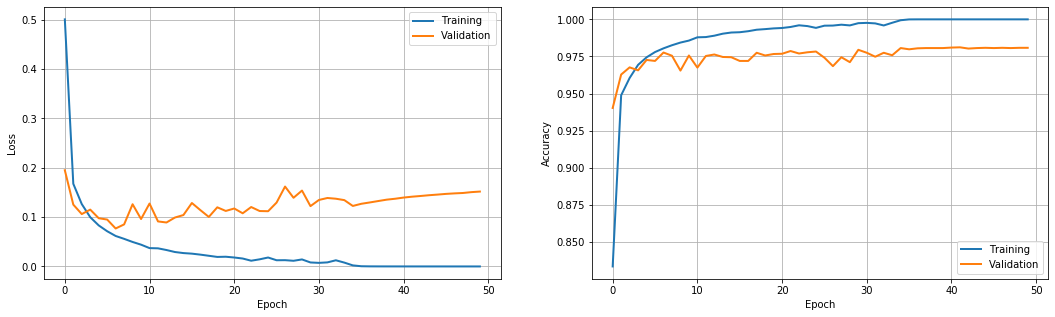

In [47]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [48]:
# Compute test loss and min training loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)
print("Training_loss:", DNN.history.history['loss'][-1])

Test loss: 0.1782729710308512
Test acc: 0.9768000245094299
Training_loss: 3.2868548568009686e-05


Obtivimos un training loss de **3.2868e-5** contra un test loss de **0.1782** y un test accuracy de **0.9768**. 

La grafica de la izquierda nos muestra que existe un sobre entrenamiento en el modelo, considerando que en las ultimas epocas se observa como la perdida del "Validation" set incrementa mientras que la del "Training" set disminuye. Esto nos habla de que nuestro modelo no esta generalizando correctamente. 

In [49]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [50]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

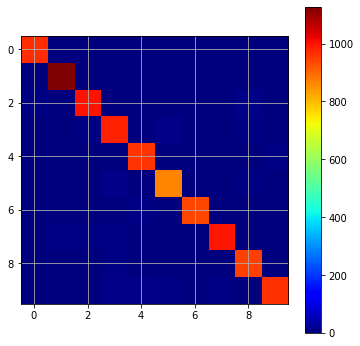

In [51]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

## Q4: Ahora usa esos mismos valores de hiperparámetros (número de capas y sus tamaños) en el segundo modelo, y ajusta la taza de dropout, y las alfas en los regularizadores l1 y l2 para disminuir el error de generalización (validación). Reporta el modelo regularizado que te haya dado mejores resultados.

Se implementó una red profunda de 5 capas ocultas "relu", con nodos 64, 64, 128, 64, 64. Ademas, se incluyeron dos regularizadores:
+ Dropout (rate de 0.33)
+ Batch normalization

In [62]:
# Create a Deep Network
DNN = Sequential()

# -- Try Q4--
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
DNN.add(Dropout(rate=0.33))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
DNN.add(BatchNormalization())
DNN.add(Dense(128, kernel_initializer='uniform', activation='relu'))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))

# -- ------ --
DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 64)               

In [63]:
# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más
# opciones.
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.0, nesterov=False)
DNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

In [64]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=32, epochs=50
                  , verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 46us/step - loss: 2.0555 - accuracy: 0.2600 - val_loss: 1.2307 - val_accuracy: 0.5100
Epoch 2/50
54000/54000 [==============================] - 2s 39us/step - loss: 0.7637 - accuracy: 0.7600 - val_loss: 0.2550 - val_accuracy: 0.9363
Epoch 3/50
54000/54000 [==============================] - 2s 39us/step - loss: 0.3843 - accuracy: 0.8911 - val_loss: 0.1666 - val_accuracy: 0.9580
Epoch 4/50
54000/54000 [==============================] - 2s 40us/step - loss: 0.3009 - accuracy: 0.9137 - val_loss: 0.1437 - val_accuracy: 0.9627
Epoch 5/50
54000/54000 [==============================] - 2s 38us/step - loss: 0.2690 - accuracy: 0.9237 - val_loss: 0.1384 - val_accuracy: 0.9628
Epoch 6/50
54000/54000 [==============================] - 2s 38us/step - loss: 0.2455 - accuracy: 0.9292 - val_loss: 0.1269 - val_accuracy: 0.9663
Epoch 7/50
54000/54000 [==============================] - 2s 39us/ste

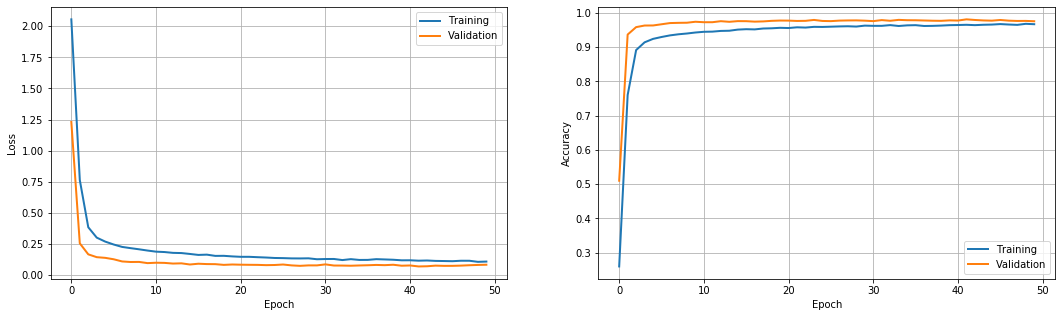

In [65]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [66]:
# Compute test loss and min training loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)
print("Training_loss:", DNN.history.history['loss'][-1])

Test loss: 0.09430031650438905
Test acc: 0.9718999862670898
Training_loss: 0.10846102882590558


Obtuvimos un training loss de **0.1084** contra un test loss de **0.094** y un test accuracy de **0.9718**.

Es importante destacar como la distancia entre el training loss y el test loss es mucho mas estrecha gracias a la implementación de **regularizadores**. Ademas, la tendecia de esta distancia es decreciente conforme avanzan las epocas, se observa la misma tendecia en la grafica de accuracy.

Un regularizador tiene la intención de reducir el error de generalización, pero no su error de entrenamiento. Un regularizador efectivo es aquel que logra un intercambio rentable, al **reducir** la **varianza** significativamente mientras que **aumentamos** el **sesgo** en mucha menor proporción.

In [67]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [68]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

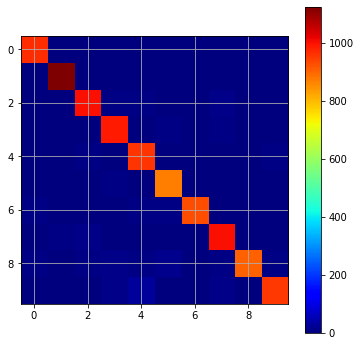

In [69]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

## Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica el número de sus capas y tamaños para disminuir aún más los errores, tanto el de entrenamiento como el de validación. Reporta tu mejor modelo.

Se implementó una red profunda de 5 capas ocultas "relu", con nodos 64, 64, 128, 64, 64. Ademas, se incluyeron cuantro regularizadores:
+ Dropout (rate de 0.33)
+ Batch normalization
+ l1
+ l2

In [84]:
# Create a Deep Network
DNN = Sequential()

# -- Try Q5--
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
DNN.add(Dropout(rate=0.33))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
DNN.add(BatchNormalization())
DNN.add(Dense(128, kernel_initializer='uniform', activation='relu'))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu', activity_regularizer=l1(l=3e-15)))
DNN.add(Dense(64, kernel_initializer='uniform', activation='relu', activity_regularizer=l2(l=3e-15)))

# -- ------ --
DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_61 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_63 (Dense)             (None, 64)              

In [85]:
# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más
# opciones.
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.0, nesterov=False)
DNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

In [86]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=32, epochs=100, verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 48us/step - loss: 2.0575 - accuracy: 0.2841 - val_loss: 1.1867 - val_accuracy: 0.6938
Epoch 2/100
54000/54000 [==============================] - 2s 41us/step - loss: 0.6786 - accuracy: 0.8007 - val_loss: 0.2352 - val_accuracy: 0.9408
Epoch 3/100
54000/54000 [==============================] - 2s 40us/step - loss: 0.3884 - accuracy: 0.8876 - val_loss: 0.1829 - val_accuracy: 0.9512
Epoch 4/100
54000/54000 [==============================] - 2s 40us/step - loss: 0.3124 - accuracy: 0.9079 - val_loss: 0.1478 - val_accuracy: 0.9577
Epoch 5/100
54000/54000 [==============================] - 2s 40us/step - loss: 0.2748 - accuracy: 0.9187 - val_loss: 0.1266 - val_accuracy: 0.9645
Epoch 6/100
54000/54000 [==============================] - 2s 39us/step - loss: 0.2540 - accuracy: 0.9253 - val_loss: 0.1209 - val_accuracy: 0.9677
Epoch 7/100
54000/54000 [==============================] - 2s 3

Epoch 56/100
54000/54000 [==============================] - 2s 42us/step - loss: 0.1102 - accuracy: 0.9656 - val_loss: 0.0772 - val_accuracy: 0.9782
Epoch 57/100
54000/54000 [==============================] - 2s 41us/step - loss: 0.1073 - accuracy: 0.9676 - val_loss: 0.0786 - val_accuracy: 0.9773
Epoch 58/100
54000/54000 [==============================] - 2s 41us/step - loss: 0.1086 - accuracy: 0.9674 - val_loss: 0.0746 - val_accuracy: 0.9787
Epoch 59/100
54000/54000 [==============================] - 2s 41us/step - loss: 0.1082 - accuracy: 0.9667 - val_loss: 0.0713 - val_accuracy: 0.9802
Epoch 60/100
54000/54000 [==============================] - 2s 42us/step - loss: 0.1059 - accuracy: 0.9676 - val_loss: 0.0753 - val_accuracy: 0.9785
Epoch 61/100
54000/54000 [==============================] - 2s 42us/step - loss: 0.1057 - accuracy: 0.9675 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 62/100
54000/54000 [==============================] - 2s 43us/step - loss: 0.1049 - accuracy: 0.9666

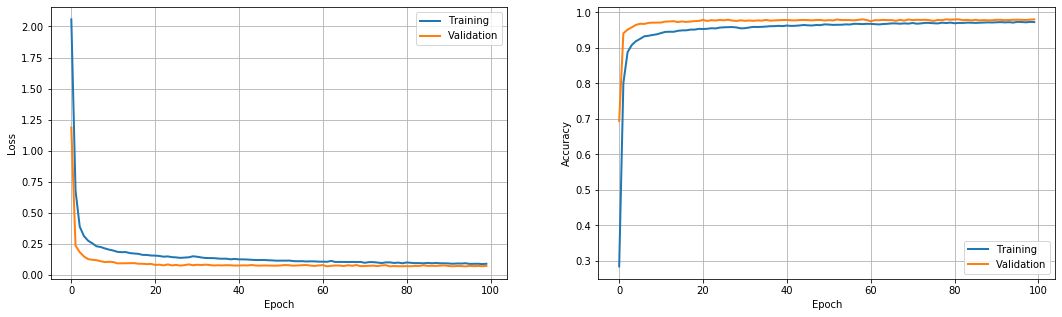

In [87]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [88]:
# Compute test loss and min training loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)
print("Training_loss:", DNN.history.history['loss'][-1])

Test loss: 0.08786698951236904
Test acc: 0.9750000238418579
Training_loss: 0.08891009589712377


Obtuvimos un training loss de **0.0878** contra un test loss de **0.0889** y un test accuracy de **0.975**.

In [89]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [90]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

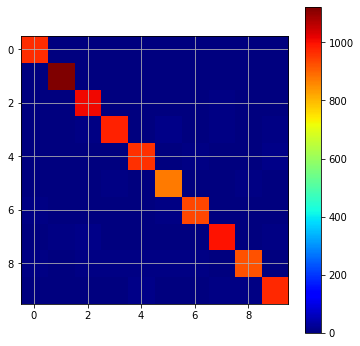

In [91]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()